# ANALISE DE DADOS

 > Neste primeiro momento vamos procurar compreender e verificar como os dados estão estruturados. Verifcaremos a integridade e consistência dos dados. É necessário que, os dados entreguem de fato as informações pelas quais foram estruturados para fornecer. Por isso, é preciso que não haja registros duplicados, ausentes ou com informações que não condizem com a realidade e a regra de negocio da empresa.

>Nosso objetivo é explorar estes dados para que futuramente possamos analisar e gerar Insghts valiosos para a tomada de decisão.

# 1.0 # Analise de Dados
>## ETAPA 1 

## 1.0.1 ANALISE EXPLORATÓRIA DE DADOS

>>### Visualização e Compreensão

>>* Vamos visualisar e compreender a organização dos dados atraves ddo formato tabela utilizando a biblioteca pandas
>>* Entenderemos os tipos de cada coluna
>>* Vamos checar a existência de valores inexistentes e também se há registros duplicados

In [78]:
#Para este projeto será considerado como boa prática realizar todas importações na mesma celula de script logo no inicio
#Afim de facilitar revisões e capazes correções futuras

#Carregando Bibliotecas que nos auxiliarão nas visulizaçãos durante as analises
import matplotlib.pyplot as plt
import seaborn as sns

#Iremos excluir mensagens de warning para os gráficos, por hora não sera considerado necessário
import warnings
warnings.filterwarnings("ignore")

#Esta será utilizada para analisar nossa tabela
import pandas as pd

# Instalando biblioteca que sera utilizada na etapa 4
!pip install pymysql sqlalchemy

# realizando import para conxexão no banco de dados
from sqlalchemy import create_engine

In [2]:
# Carregar o arquivo Excel sales_data.csv.xlsx, no qual será chamado apenas sales
sales = pd.read_excel('sales_data.csv.xlsx')

In [3]:
# Vamos visualizar primeiras linhas do DataFrame para entender sua estrutura
sales.head()

,order_id,product_name,quantity,unit_price,cliente_id,order_date
0,1,Produto A,3,25,74,2024-03-01
1,2,Produto B,2,30,36,2024-03-02
2,3,Produto C,1,20,12,2024-03-03
3,4,Produto A,4,25,92,2024-03-04
4,5,Produto D,2,40,55,2024-03-05


In [4]:
# Informações gerais sobre o DataFrame, incluindo tipos de dados e valores nulos
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      100 non-null    int64         
 1   product_name  100 non-null    object        
 2   quantity      100 non-null    int64         
 3   unit_price    100 non-null    int64         
 4   cliente_id    100 non-null    int64         
 5   order_date    100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 4.8+ KB


In [5]:
# validar a não existência de valores nulos
sales.isnull().sum()

order_id        0
product_name    0
quantity        0
unit_price      0
cliente_id      0
order_date      0
dtype: int64

In [6]:
# Verificar a existência de valores duplicados
sales.duplicated().sum()

0

### Informações Gerais Sobre os Dados

* O dataset contém 100 registros com 6 colunas: order_id, product_name, quantity, unit_price, cliente_id e order_date.
  
* Não há valores nulos no dataset.
  
* Não há registros duplicados.

## 1.0.2 Verificação de Integridade dos Dados
>### Procurando por Dados Possivelmente Errados, tais como:



>>*  Verificar se os valores nas colunas estão dentro dos intervalos esperados.
  
>>*  Verificar se todas as datas são válidas e fazem sentido no contexto dos dados.

>>*  Garantir que todas as colunas têm o tipo de dado correto.

>>*  Verificar se a quantidade e os preços dos produtos não são negativos.
>>*  Checaremos a descrição dos dados

In [7]:
# Vamos adicionar uma coluna de receita total, onde teremos o valor total por venda de produtos
sales['total_revenue'] = sales['quantity'] * sales['unit_price']

In [8]:
#visualizando resultado
sales.head()

,order_id,product_name,quantity,unit_price,cliente_id,order_date,total_revenue
0,1,Produto A,3,25,74,2024-03-01,75
1,2,Produto B,2,30,36,2024-03-02,60
2,3,Produto C,1,20,12,2024-03-03,20
3,4,Produto A,4,25,92,2024-03-04,100
4,5,Produto D,2,40,55,2024-03-05,80


### Verificação 1:
* Vamos Verificar se há valores de quantidade (quantity) e preço unitário (unit_price) menores ou iguais a zero.Valores negativos ou zero não fazem sentido nesses contextos e são considerados dados errados.

In [9]:
#Para isso, vamos criar duas variaveis para vericar as respectivas colunas 'quantity' e 'unit_price', isso mostrara se ha valores negativos
invalid_quantity = sales[(sales['quantity'] <= 0)]
invalid_unit_price = sales[(sales['unit_price'] <= 0)]

### Verificação 2:
* Datas: Assumimos que todas as datas de pedidos (order_date) devem estar dentro do ano de 2024. Verificaremos se há datas fora desse intervalo.

In [10]:
# Verificando Datas inválidas (assumindo que a coluna 'order_date' deve estar em 2024)
invalid_dates = sales[~sales['order_date'].between(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-12-31'))]


### Verificação 3:

* Tipos de Dados: Vamos verificamos se os tipos de dados das colunas são consistentes e apropriados (quantidade e preços devem ser numéricos, e as datas devem ser do tipo datetime).

In [11]:
# Tipos de dados inconsistentes
data_types_correct = all([pd.api.types.is_numeric_dtype(sales['quantity']),
                          pd.api.types.is_numeric_dtype(sales['unit_price']),
                          pd.api.types.is_numeric_dtype(sales['total_revenue']),
                          pd.api.types.is_datetime64_any_dtype(sales['order_date'])])


In [12]:
# Exibir Resultados de dados inválidos encontrados
print("Quantidade Inválida:", invalid_quantity)
print("Preços Inválidos:", invalid_unit_price)
print("Datas Inválidas:", invalid_dates)
print("Tipos de Dados Consistentes:", data_types_correct)

Quantidade Inválida: Empty DataFrame
Columns: [order_id, product_name, quantity, unit_price, cliente_id, order_date, total_revenue]
Index: []
Preços Inválidos: Empty DataFrame
Columns: [order_id, product_name, quantity, unit_price, cliente_id, order_date, total_revenue]
Index: []
Datas Inválidas: Empty DataFrame
Columns: [order_id, product_name, quantity, unit_price, cliente_id, order_date, total_revenue]
Index: []
Tipos de Dados Consistentes: True


In [13]:
# Checando Informações Descritivas
sales.describe().T

,count,mean,min,25%,50%,75%,max,std
order_id,100.0,50.5,1.0,25.75,50.5,75.25,100.0,29.011492
quantity,100.0,2.34,1.0,2.0,2.0,3.0,4.0,0.976698
unit_price,100.0,28.6,20.0,23.75,25.0,30.0,40.0,7.353965
cliente_id,100.0,49.12,1.0,25.5,49.5,76.0,100.0,29.403594
order_date,100,2024-04-19 12:00:00,2024-03-01 00:00:00,2024-03-25 18:00:00,2024-04-19 12:00:00,2024-05-14 06:00:00,2024-06-08 00:00:00,NaN
total_revenue,100.0,66.45,20.0,40.0,60.0,82.5,120.0,31.126128


### Insights Gerais Dos Dados de Vendas:

>>* A Média de Receita total das vendas é 66.4. O valor máximo em vendas foi 120 e o minimo foi 20, o que condiz com o produto de menor valor disponível.

>>* A Média de Preços unitarios dos produtos é de 28.6. Já o valor minimo é 20 e o máximo é de 40 o que pode indicar uma variação significativa nos preços dos produtos, indicando uma gama diversificada de produtos com diferentes faixas de preço.

>>* Todas as datas de pedidos estão dentro do intervalo esperado (ano de 2024), o que indica que os dados de datas são consistentes e apropriados.

>### Conclusões Gerais
>* Qualidade dos Dados: Os dados parecem ser de alta qualidade, sem quantidades ou preços inválidos, e todas as datas estão dentro do intervalo esperado.
>* Consistência dos Dados: Os tipos de dados estão corretos, garantindo que as colunas contêm os tipos de dados apropriados para análise.


## 1.0.3 Explorando Dados de Clientes

> ### Visualização e Compreensão
> * Nesta etapa nosso objetivo é replicar as boas práticas realizadas anteriormente para os dados de vendas, isso permitirá que ao termino das nossas analises, os insghts gerados sejam validados por dados que tenham integridade e consistência necessárias.

>>* Vamos visualisar e compreender a organização dos dados atraves de uma tabela utilizando a biblioteca pandas
>>* Entenderemos os tipos de cada coluna
>>* Vamos checar a existência de valores inexistentes e também se há registros duplicados

In [14]:
# Carregar o arquivo customer_data.csv, o qual será chamado apenas de customer
customer = pd.read_csv('customer_data.csv', sep=',', encoding='LATIN-1')

In [15]:
# Vamos visualizar primeiras linhas do DataFrame para entender sua estrutura
customer.head()

,id_cliente,nome,sobrenome,email,telefone,endereço,numero
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654


In [16]:
# Informações gerais sobre o DataFrame, incluindo tipos de dados e valores nulos
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  100 non-null    int64 
 1   nome        100 non-null    object
 2   sobrenome   100 non-null    object
 3   email       100 non-null    object
 4   telefone    100 non-null    object
 5   endereço    100 non-null    object
 6   numero      100 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [17]:
# validar a não existência de valores nulos
customer.isnull().sum()

id_cliente    0
nome          0
sobrenome     0
email         0
telefone      0
endereço      0
numero        0
dtype: int64

In [18]:
# Verificar a existência de valores duplicados
customer.duplicated().sum()

0

### Informações Gerais Sobre os Dados de Clientes: 

* Não Foram Encontrados Registros Ausentes.

* O Tipo de cada coluna condiz com os dados registrados, até então não se fazendo necessário o trabatamento dos registros para analises futuras.

* Não Foram Encontradas Duplicidades nos registros

>  ### Conclusões Gerais
>* Qualidade dos Dados: Os dados parecem ser de alta qualidade, sem quantidades ou preços inválidos, e todas as datas estão dentro do intervalo esperado.
>* Consistência dos Dados: Os tipos de dados estão corretos, garantindo que as colunas contêm os tipos de dados apropriados para análise.

# 2.0 Transformação de Dados
>## ETAPA 2

### 2.0.1 Visulização das Tabelas
>* Nosso Objetivo nesta etapa será aplicar uma técnica de desnormalização nas tabelas sales e customers, processo no qual tornará ambas tabelas em apenas uma.

>* Também realizaremos o processo de feature engineering para criação de novas colunas que nos auxiliarão para responder perguntas de negócios futuras. Embora ja tenhamos realizado a criação da variável 'total_revenue' na etapa anterior.

In [19]:
#Primeiro visualizamos os primeiros registros de ambas tabelas
#visualizando tabela de vendas
sales.head()

,order_id,product_name,quantity,unit_price,cliente_id,order_date,total_revenue
0,1,Produto A,3,25,74,2024-03-01,75
1,2,Produto B,2,30,36,2024-03-02,60
2,3,Produto C,1,20,12,2024-03-03,20
3,4,Produto A,4,25,92,2024-03-04,100
4,5,Produto D,2,40,55,2024-03-05,80


In [20]:
#visualizando tabela de clientes
customer.head()

,id_cliente,nome,sobrenome,email,telefone,endereço,numero
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654


#### OBSERVAÇÃO
* É possivel notar que a coluna Id de cliente que faz relacionamento entre as tabelas possui divergência entre os nomes, vamos renomear a coluna da tabela sales para que fique como estará futuramente na tabela customer, evitando assim erro entre as junções.

* Logo em seguida, usaremos a coluna 'order_date' para criação de colunas para dia, mês e ano. Com isso, poderemos realizar filtros mais acertivos e analises de vendas temporais

In [21]:
# Renomeando coluna de ID de cliente da tabela sales

sales.rename(columns={
    'cliente_id': 'customer_id'
}, inplace=True)

In [22]:
# validando alteração
sales.head(2)

,order_id,product_name,quantity,unit_price,customer_id,order_date,total_revenue
0,1,Produto A,3,25,74,2024-03-01,75
1,2,Produto B,2,30,36,2024-03-02,60


In [23]:
# Criando colunas 'month', 'year' e 'day' 

#coluna month (mês)
sales['month'] = sales['order_date'].dt.month

#coluna year (ano)
sales['year'] = sales['order_date'].dt.year

#coluna day (dia)
sales['day'] = sales['order_date'].dt.day

In [24]:
#validando novas colunas
sales.head()

,order_id,product_name,quantity,unit_price,customer_id,order_date,total_revenue,month,year,day
0,1,Produto A,3,25,74,2024-03-01,75,3,2024,1
1,2,Produto B,2,30,36,2024-03-02,60,3,2024,2
2,3,Produto C,1,20,12,2024-03-03,20,3,2024,3
3,4,Produto A,4,25,92,2024-03-04,100,3,2024,4
4,5,Produto D,2,40,55,2024-03-05,80,3,2024,5


#### OBSERVAÇÃO

* Na tabela de clientes, nome e sobrenome estão em colunas separadas. Porém, como estamos desnormalizando os dados para termos somente uma unica tabela, vamos unir essas duas colunas em apenas uma nova chamada 'name_customer'.

* Logo em seguida, descartaremos as duas primeiras colunas originais e manteremos somente a 'name_customer'

* Por fim, notamos que as colunas das tabelas sales e customer divergem sobre o idioma usado nos nomes das colunas. Renomearemos a tabela customer para que fique em inglês assim como está na tabela sales. Optamos por manter o idioma inglês visando menores chances de erros e bugs no dercorrer do projeto, dado que as linguagens de programação que estamos utilizando (Python e SQL) são nativas de lingua inglesa.

In [25]:
# Combinando as colunas 'nome' e 'sobrenome' em uma única coluna 'name_customer'
customer['name_customer'] = customer['nome'] + ' ' + customer['sobrenome']

In [26]:
#visualizando alteração
customer.head(1)

,id_cliente,nome,sobrenome,email,telefone,endereço,numero,name_customer
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123,João Silva


In [27]:
# Removendo as colunas originais 'nome' e 'sobrenome' 
customer.drop(columns=['nome', 'sobrenome'], inplace=True)

#validando alteração
customer.head(1)

,id_cliente,email,telefone,endereço,numero,name_customer
0,1,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123,João Silva


In [28]:
# Renomeando colunas para inglês
customer.rename(columns={
    'id_cliente': 'customer_id',
    'email': 'email',
    'telefone': 'phone',
    'endereço': 'address',
    'numero': 'number',
    'name_customer': 'name_customer'
}, inplace=True)

In [29]:
#validando nomes das colunas
customer.head()

,customer_id,email,phone,address,number,name_customer
0,1,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123,João Silva
1,2,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456,Maria Santos
2,3,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789,Carlos Rocha
3,4,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987,Ana Costa
4,5,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654,Luiz Oliveira


### 2.0.2 Combinando tabelas
>* Para unir as tabelas faremos junção do tipo 'inner join' que retorna apenas as linhas onde há correspondência em ambas as tabelas,  isso significa que só serão incluídas as vendas para as quais há informações de cliente correspondentes.

In [30]:
# Combinando as tabelas usando a chave 'customer_id', chamaremos a nova tabela de 'sales_analytics'
sales_analytics = pd.merge(sales, customer, on='customer_id', how='inner')

In [31]:
# Visualizando resultado do join
sales_analytics.head()

,order_id,product_name,quantity,unit_price,customer_id,order_date,total_revenue,month,year,day,email,phone,address,number,name_customer
0,1,Produto A,3,25,74,2024-03-01,75,3,2024,1,diego.souza@email.com,(11) 4567-8901,Rua dos Girassóis,654,Diego Souza
1,2,Produto B,2,30,36,2024-03-02,60,3,2024,2,isabela.rodrigues@email.com,(11) 6789-0123,Quadra 5,321,Isabela Rodrigues
2,26,Produto A,4,25,36,2024-03-26,100,3,2024,26,isabela.rodrigues@email.com,(11) 6789-0123,Quadra 5,321,Isabela Rodrigues
3,3,Produto C,1,20,12,2024-03-03,20,3,2024,3,beatriz.martins@email.com,(11) 2345-6789,Avenida dos Lírios,987,Beatriz Martins
4,15,Produto B,4,30,12,2024-03-15,120,3,2024,15,beatriz.martins@email.com,(11) 2345-6789,Avenida dos Lírios,987,Beatriz Martins


In [32]:
#  Verificando se o número de colunas faz sentido
sales_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       100 non-null    int64         
 1   product_name   100 non-null    object        
 2   quantity       100 non-null    int64         
 3   unit_price     100 non-null    int64         
 4   customer_id    100 non-null    int64         
 5   order_date     100 non-null    datetime64[ns]
 6   total_revenue  100 non-null    int64         
 7   month          100 non-null    int32         
 8   year           100 non-null    int32         
 9   day            100 non-null    int32         
 10  email          100 non-null    object        
 11  phone          100 non-null    object        
 12  address        100 non-null    object        
 13  number         100 non-null    int64         
 14  name_customer  100 non-null    object        
dtypes: datetime64[ns](1), in

In [33]:
# Verificando correspondências de 'cliente_id'

missing_customers = sales[~sales['customer_id'].isin(customer['customer_id'])]

if not missing_customers.empty:
    print("\nIDs de Clientes nos Dados de Vendas que não têm correspondência nos Dados de Clientes:")
    print(missing_customers)
else:
    print("\nTodos os IDs de Clientes nos Dados de Vendas têm correspondência nos Dados de Clientes.")



Todos os IDs de Clientes nos Dados de Vendas têm correspondência nos Dados de Clientes.


In [34]:
# Verificando se há valores nulos em colunas críticas

# Definindo colunas críticas
critical_columns = ['order_id', 'product_name', 'quantity', 'unit_price', 'customer_id',
       'order_date', 'total_revenue', 'month', 'year', 'day', 'email', 'phone',
       'address', 'number', 'name_customer']

# Valindando se há valores ausentes nas colunas críticas
null_values = sales_analytics[critical_columns].isnull().sum()
print("\nValores Nulos em Colunas Críticas:")
print(null_values)


Valores Nulos em Colunas Críticas:
order_id         0
product_name     0
quantity         0
unit_price       0
customer_id      0
order_date       0
total_revenue    0
month            0
year             0
day              0
email            0
phone            0
address          0
number           0
name_customer    0
dtype: int64


In [35]:
# Validando ausência de duplicidades atraves da coluna order_id

duplicates_order_id = sales_analytics.duplicated(subset='order_id')
num_duplicates_order_id = duplicates_order_id.sum()
print(f"Número de 'order_id' Duplicados: {num_duplicates_order_id}")


Número de 'order_id' Duplicados: 0


#### OBSERVAÇÃO

* A Validação da correspondência atraves da coluna customer_id mostra que a cobinação entre as tabelas foi efetuada com sucesso.
  
* A integridade dos dados permanece consistente, visto que o join não gerou nenhum valor ausente

* Não foram geradas nenhuma duplicidades nos registros após efetuado o 'join'.

# 3.0 Visualização de Dados
>## ETAPA 3

### 3.0.1 Visulização das Tabelas

>* Nosso Objetivo nesta etapa será validar Isights gerados durante a etapa de exploração de dados.

>* Vamos utilizar gráficos para validar nossos Insghts de maneira visual e de facil entendimento.


>> ### Insights Gerados anteriormente:

>>* A Média de Receita total das vendas é 66.4. O valor máximo em vendas foi 120 e o minimo foi 20, o que condiz com o produto de menor valor disponível.

>>* A Média de Preços unitarios dos produtos é de 28.6. Já o valor minimo é 20 e o máximo é de 40 o que pode indicar uma variação significativa nos preços dos produtos, indicando uma gama diversificada de produtos com diferentes faixas de preço.

>>* Todas as datas de pedidos estão dentro do intervalo esperado (ano de 2024), o que indica que os dados de datas são consistentes e apropriados.


## 3.0.2 Validando Insights

### Insight 1:
> * A Média de Receita total das vendas é 66.4. O valor máximo em vendas foi 120 e o minimo foi 20, o que condiz com o produto de menor valor disponível.

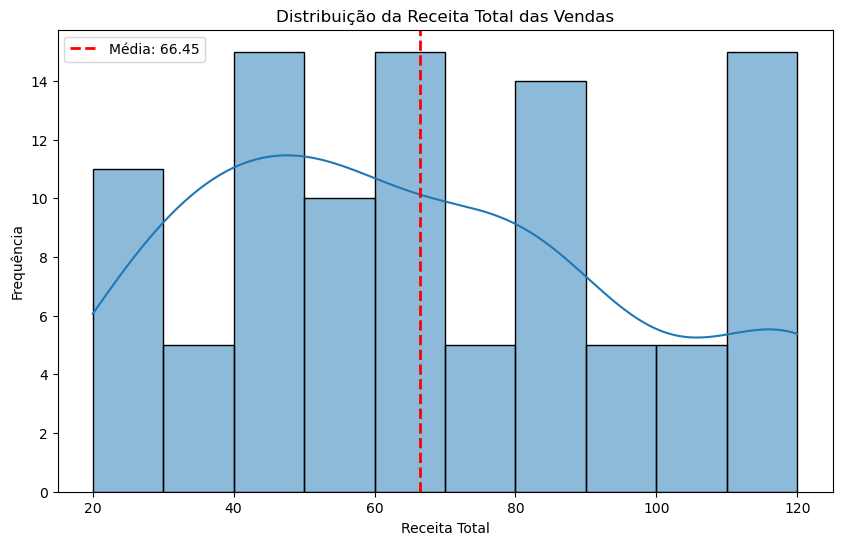

In [75]:
# Define a média do total de vendas
mean_total_revenue = sales_analytics['total_revenue'].mean()

# Gera gráfico que mostra a qualtide de vendas total
plt.figure(figsize=(10, 6))
sns.histplot(sales_analytics['total_revenue'], bins=range(20, 125, 10), kde=True)
plt.axvline(mean_total_revenue, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_total_revenue:.2f}')
plt.title('Distribuição da Receita Total das Vendas')
plt.xlabel('Receita Total')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### Insght 1: Correto, o grafico valida o valor 20 para valor minimo de vendas e 120 para valor máximo. També é possivel notar que a média está em 66.45 

### Insight 2:

> * A Média de Preços unitarios dos produtos é de 28.6. Já o valor minimo é 20 e o máximo é de 40. O que pode indicar uma variação significativa nos preços dos produtos, indicando uma gama diversificada de produtos com diferentes faixas de preço

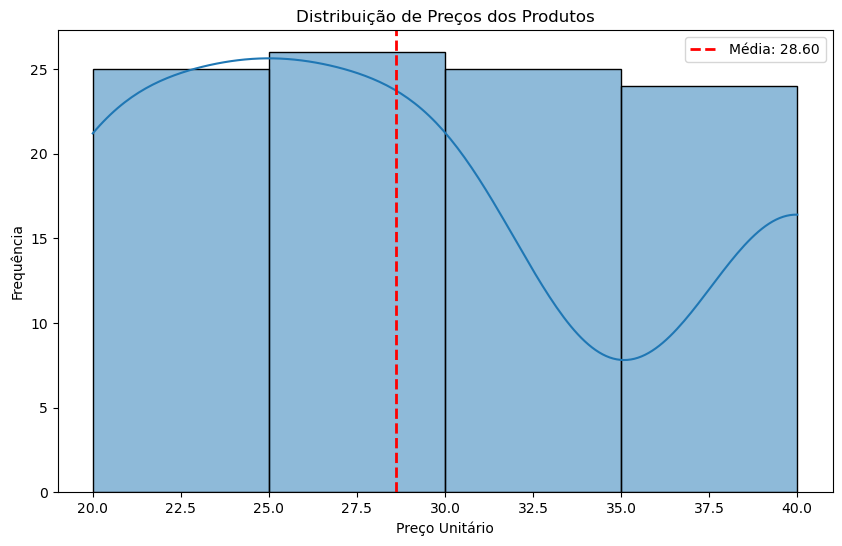

In [74]:

# Definindo média de valores unitarios
mean_unit_price = sales_analytics['unit_price'].mean()

# Gerando gráfico que mostra valores unicos com a média
plt.figure(figsize=(10, 6))
sns.histplot(sales_analytics['unit_price'], bins=range(20, 45, 5), kde=True)
plt.axvline(mean_unit_price, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_unit_price:.2f}')
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### Insght 2: Correto, o gráfico mostra que os preço unitários varim entre 20 e 40, com média de 28.6.

### Insight 3:
> * Todas as datas de pedidos estão dentro do intervalo esperado (ano de 2024), o que indica que os dados de datas são consistentes e apropriados.

In [76]:
# Filtrando somente os dados de 2024
sales_2024 = sales_analytics[sales_analytics['year'] == 2024]

# Descrição dos dados de 2024
sales_2024.describe().T

,count,mean,min,25%,50%,75%,max,std
order_id,100.0,50.5,1.0,25.75,50.5,75.25,100.0,29.011492
quantity,100.0,2.34,1.0,2.0,2.0,3.0,4.0,0.976698
unit_price,100.0,28.6,20.0,23.75,25.0,30.0,40.0,7.353965
customer_id,100.0,49.12,1.0,25.5,49.5,76.0,100.0,29.403594
order_date,100,2024-04-19 12:00:00,2024-03-01 00:00:00,2024-03-25 18:00:00,2024-04-19 12:00:00,2024-05-14 06:00:00,2024-06-08 00:00:00,NaN
total_revenue,100.0,66.45,20.0,40.0,60.0,82.5,120.0,31.126128
month,100.0,4.16,3.0,3.0,4.0,5.0,6.0,0.96106
year,100.0,2024.0,2024.0,2024.0,2024.0,2024.0,2024.0,0.0
day,100.0,14.93,1.0,7.0,14.5,23.0,31.0,9.101288
number,100.0,648.78,123.0,321.0,654.0,987.0,987.0,281.067646


### Insght 3: Correto, a tabela descritiva valida que a quantidade pedidos máxima foi 100 'order_id' e que a quantidade máxima de receita total foi 120, assim como descrito no insight numero 1.

# 4.0 Banco de Dados
>## ETAPA 4

### 4.0.1 Visulização das Tabelas

>* Nosso Objetivo nesta etapa será responder 2 perguntas de negocios atraves da tabelas 'sales_anaalytics'
>* Para isso iremos nos conectar localmente ao bando de dados relacional MySQL e efetuar a carga dos dados.
>* Feito isso, vamos utilizar a interface do Mysql WorkBench como SGBD para realizar nossas consultas e respoder nossas perguntas.

>> ### Perguntas a serem respondidas:
    >> * Qual o valor máximo vendido por mês durante o ano de 2024?
    >> * Quais foram os produtos mais vendidos durante o primeiro semestre de 2024?

### 4.0.2 Conectando ao Mysql

In [79]:
# Dados de conexão
user = 'root'
password = '589619'
host = 'localhost'
port = '3306'
database = 'analytics'

In [80]:
# Criação da conexão usando SQLAlchemy
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

In [82]:
#Definindo tabela
data = pd.DataFrame(sales_analytics)

# Carregar a tabela Pandas no banco de dados MySQL
# 'nome_da_tabela' é o nome da tabela onde os dados serão inseridos
data.to_sql('fact_analytics', con=engine, if_exists='replace', index=False)

# Mostra Resultado da Carga
print("Tabela carregada com sucesso no banco de dados MySQL")

Tabela carregada com sucesso no banco de dados MySQL
